In [23]:
print("Hello")

Hello


In [24]:
## tools
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [25]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arxiv papers")
print(arxiv.name)

arxiv


In [26]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [27]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki, description="Query Wikipedia")
print(wiki.name)

wikipedia


In [28]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [29]:
## Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [30]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': '### Wednesday, April 9, 2025\n\n### Tuesday, April 8, 2025\n\n### Thursday, April 3, 2025\n\n### Thursday, March 27, 2025\n\n### Wednesday, March 26, 2025\n\n### Tuesday, March 25, 2025\n\n### Wednesday, March 19, 2025\n\n### Tuesday, March 18, 2025\n\n### Monday, March 17, 2025\n\n### Thursday, March 6, 2025\n\n### Wednesday, March 5, 2025\n\n### Tuesday, March 4, 2025\n\n### Wednesday, February 26, 2025\n\n### Tuesday, February 25, 2025\n\n### Friday, February 21, 2025\n\n### Thursday, February 20, 2025 [...] ![ScienceDaily](/images/sd-logo.png)\n\n# Artificial Intelligence News\n\n## Top Headlines\n\n## Latest Headlines\n\n## Earlier Headlines\n\n### Tuesday, May 13, 2025\n\n### Monday, May 12, 2025\n\n### Thursday, May 8, 2025\n\n### Wednesday, May 7, 2025\n\n### Tuesday, May 6, 2025\n\n### Monday, May 5, 2025\n\n### Thursday,

In [31]:
## con]mbine all these tools in the list
tools = [arxiv, wiki, tavily]

In [32]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen-qwq-32b")

In [33]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, so I need to explain what AI is. Let me start by recalling what I know. AI stands for Artificial Intelligence, right? But what exactly does that mean? I think it refers to machines or systems that can perform tasks that usually require human intelligence. But I should make sure I get the basics right.\n\nFirst, maybe I should define AI in simple terms. It\'s like making machines smart, so they can do things like learn, problem-solve, recognize speech, or make decisions. But maybe I should break it down more. There\'s general AI and narrow AI. Wait, the user asked for a general explanation, so maybe I should cover both?\n\nI remember that AI can be categorized into different types. There\'s weak AI and strong AI. Weak AI is when the system is designed for a specific task, like voice assistants like Siri or Alexa. They can understand voice commands but aren\'t conscious. Strong AI would be systems that can handle any intellectual task a human can, but 

In [34]:
llm_with_tools = llm.bind_tools(tools=tools)

In [35]:
## Execute this call
llm_with_tools.invoke("What is the latest news on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fw75', 'function': {'arguments': '{"query":"latest news on quantum computing"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 231, 'prompt_tokens': 323, 'total_tokens': 554, 'completion_time': 0.56382683, 'prompt_time': 0.054940232, 'queue_time': 0.246791138, 'total_time': 0.618767062}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bdf5c870-2e00-4d07-b05f-22911cea21ec-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'latest news on quantum computing'}, 'id': 'call_fw75', 'type': 'tool_call'}], usage_metadata={'input_tokens': 323, 'output_tokens': 231, 'total_tokens': 554})

In [36]:
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_nfht', 'function': {'arguments': '{"query":"Machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 209, 'prompt_tokens': 319, 'total_tokens': 528, 'completion_time': 0.509670121, 'prompt_time': 0.033898216, 'queue_time': 0.427327354, 'total_time': 0.543568337}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--19487938-e263-4770-a363-219aedaf75fd-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine learning'}, 'id': 'call_nfht', 'type': 'tool_call'}], usage_metadata={'input_tokens': 319, 'output_tokens': 209, 'total_tokens': 528})

# Workflow

In [37]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [38]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [39]:
## Entire Chatbot with LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

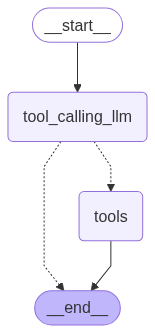

In [47]:
## Node definition
def tool_calling_llm(state:State):
    return {"message":[llm_with_tools.invoke(state["messages"])]}

# Build the graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

#View
display(Image(graph.get_graph().draw_mermaid_png()))

In [50]:
messages = graph.invoke({"messages":"1706.03762"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_11qk)
 Call ID: call_11qk
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base
================================== Ai Message ==================================

The paper **"Attention Is All You Need"** (arXiv:1706.03762) introd

In [45]:
messages=graph.invoke({"messages":"Hi My name is Krish"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Krish


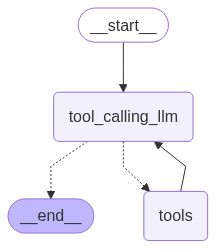

In [48]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [49]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_phxe)
 Call ID: call_phxe
  Args:
    query: recent AI news
  arxiv (call_faj8)
 Call ID: call_faj8
  Args:
    query: recent quantum computing research
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "**Date:** June 1, 2025  \n**Summary:** Ukraine reportedly used AI-enhanced drone swarms in a covert mission dubbed âOperation Spider Webâ to target a Russian bomber. The drones, said to cost as little as the price of an iPhone 16 Pro, represent a new phase of low